# Classification

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

## MNIST

+ a set of 70000 small images of digits handwritten
+ each image has 784 features, because each image is 28x28 pixels(像素), and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black)
+ each image is labeled with the digit it represent


Fetches the MNIST dataset:

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

**Datasets loaded by Scikit-Learn** generally have a similar dictionary structure including:
+ a **DESCR** key describing the dataset
+ a **data** key containing an array with one row per instance and one column per feature
+ a **target** key containing an array with the labels

Look at these arrays:

In [25]:
X, y = mnist["data"], mnist["target"]
print(X.shape, "\t", y.shape)

(70000, 784) 	 (70000,)


In [4]:
print("The type of X:\t", type(X))
print("The type of y:\t", type(y))

The type of X:	 <class 'numpy.ndarray'>
The type of y:	 <class 'numpy.ndarray'>


Take a peek at on digit from the dataset: 
1. grab an instances's feature vector
2. reshape it to a 28x28 array
3. and display it using Matplotlib's `imshow()` func:

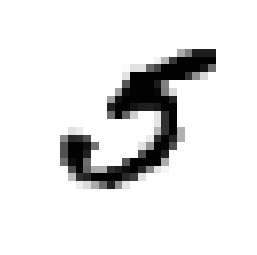

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[36000]

5.0

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

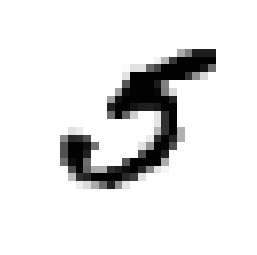

In [8]:
plot_digit(X[36000])

<font color='red'>U should always create a test set and set it aside before inspecting the data closely.</font>

The MNIST dataset is actually already split into a training set (the first 60000 images) and a test set (the last 10000 images).

In [9]:
y[:60000]

array([0., 0., 0., ..., 9., 9., 9.])

In [26]:
y[60000:]

array([0., 0., 0., ..., 9., 9., 9.])

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle the training set; this will guarantee that all cross-validation folds will be similar (u don't want one fold to be missing some digits).

In [31]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

Simplify the problem for now and only try to identify one digit (the number 5). This "5-detector" will be an example of a <font color='red'>**binary classifier**</font>, capable of distinguishing between just two classes, 5 and not-5.

Create the target vectors for this classification task:

In [33]:
# True fo all 5s, False for all other digits
y_train_5 = (y_train == 5)
y_train_5

array([False, False, False, ..., False, False, False])

In [34]:
y_test_5 = (y_test == 5)

Start with a <font color='red'>**Stochastic Gradient Descent (SGD)**</font> (having a advantage of being capable of handling very large datsets efficiently).

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [38]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

#### Measuring Accuracy Using Cross-Validation